<a href="https://colab.research.google.com/github/alik604/eminem_lyrics_generator/blob/master/eminem_lyrics_generator_LSTM_%26_HMM_Alik604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# By Alik604
## Adapted from https://github.com/rojagtap/eminem_lyrics_generator
> 

In [265]:
# from google.colab import drive
# drive.mount('/content/drive')
# cd /content/drive/My Drive/Data

In [266]:
# !pip install hmmlearn pomegranate


import pandas as pd
import numpy as np
import re
import os
import glob
import json
import requests

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Starting Preprocessing - Check point
> This can be disreguarded as data is provided a single .csv

In [267]:
## retain

# !pip install lyricsgenius
# import lyricsgenius
# genius = lyricsgenius.Genius("8AO32_nfbxk_8yNyBYJTnw_4qRjT2Uid1pMSW_XJ_56sBsnNLuXeKxwMMEZmQrQN") # this is a valid key :) 
# artist = genius.search_artist("Eminem", max_songs=100, sort='popularity') # XXXTENTACION 
# for i in range(100):
#   artist.songs[i].save_lyrics()

In [268]:
# lines = []
# i = 1
# for root, dirs, files in os.walk('./raw'):
#     for file in files:
#         if file.endswith('.json') and 'xxxtentacion' in file : # eminem  # xxxtentacion
#             file = open("./raw/" + file)
#             json_data = file.read()
#             data = json.loads(json_data)
#             lines.append(data['lyrics'])
#             i +=1
# print(i)
# lines = list(filter(None, lines))
# # lines

In [269]:
def clean_text(sentence):
  sentence = sentence.lower()
  sentence = re.sub(r'\[.*?\]', "", sentence) # https://www.regextester.com/97589 &  https://stackoverflow.com/a/40621332
  sentence = re.sub(r"\u2005", "", sentence)

  sentence = re.sub(r"’", "\'", sentence) 
  sentence = re.sub(r"‘", "\'", sentence)
  sentence = re.sub(r"i'm", "i am", sentence)
  sentence = re.sub(r"he's", "he is", sentence)
  sentence = re.sub(r"she's", "she is", sentence)
  sentence = re.sub(r"it's", "it is", sentence)
  sentence = re.sub(r"that's", "that is", sentence)
  sentence = re.sub(r"what's", "what is", sentence)
  sentence = re.sub(r"where's", "where is", sentence)
  sentence = re.sub(r"there's", "there is", sentence)
  sentence = re.sub(r"who's", "who is", sentence)
  sentence = re.sub(r"how's", "how is", sentence)
  sentence = re.sub(r"\'ll", " will", sentence)
  sentence = re.sub(r"\'ve", " have", sentence)
  sentence = re.sub(r"\'re", " are", sentence)
  sentence = re.sub(r"\'d", " would", sentence)
  sentence = re.sub(r"won't", "will not", sentence)
  sentence = re.sub(r"can't", "cannot", sentence)
  sentence = re.sub(r"n't", " not", sentence)
  sentence = re.sub(r"n'", "ng", sentence)
  sentence = re.sub(r"\'bout", "about", sentence)
  sentence = re.sub(r"'til", "until", sentence)
  sentence = re.sub(r"c'mon", "come on", sentence)
  sentence = re.sub("\n", " ", sentence)

  sentence = re.sub(r"\u2005", "", sentence)
  sentence = re.sub("[-*/()\"’‘'#/@;:<>{}`+=~|!?,]", "", sentence) # should it be:  \'   rather than '   # TODO note: removed . 
  sentence = re.sub(r"'", "", sentence)
  sentence = re.sub(r"\t", "", sentence)
  sentence = re.sub(r"\r", "", sentence)
  sentence = re.sub(r"\n", "", sentence)

  sentence = re.sub(r"  ", " ", sentence)
  sentence = re.sub(r"  ", " ", sentence)
  return sentence
# lines = pd.DataFrame(lines, columns=['lines'])
# lines.lines = lines.lines.apply(lambda line: clean_text(line))
# lines.values

# lines.to_csv('./preprocessed_data_xxxtentacion.csv')

# Starting ML - Check point

In [270]:
## Eminem
lines = pd.read_csv('https://github.com/alik604/eminem_lyrics_generator/raw/master/data/preprocessed_data_eminem.csv',index_col=0)

## XXXTentacion
# lines = pd.read_csv('https://raw.githubusercontent.com/alik604/eminem_lyrics_generator/master/data/preprocessed_data_xxxtentacion.csv',index_col=0)

## Treasure Island
# raw_text_lower = requests.get("https://data.heatonresearch.com/data/t81-558/text/treasure_island.txt").text.lower()
# processed_text = re.sub(r'[^\x00-\x7f]',r'', raw_text_lower)
# processed_text = clean_text(processed_text)
# # processed_text
# lines = pd.DataFrame(processed_text.split(".")[270:], columns=["lines"])
# print(lines.shape)
# lines.drop_duplicates(inplace=True)
# print(lines.shape)


lines.head(5)

,lines
0,look i was gonna go easy on you not to hurt y...
1,you sound like a bitch bitch shut the fuck up...
2,look if you had one shot or one opportunity t...
3,i am friends with the monster that is under m...
4,ugh you are a monster i can swallow a bottle ...


In [271]:
lines.lines = lines.lines.apply(lambda line: line.split())
lines.head(5)

,lines
0,"[look, i, was, gonna, go, easy, on, you, not, ..."
1,"[you, sound, like, a, bitch, bitch, shut, the,..."
2,"[look, if, you, had, one, shot, or, one, oppor..."
3,"[i, am, friends, with, the, monster, that, is,..."
4,"[ugh, you, are, a, monster, i, can, swallow, a..."


In [272]:
x_train = [line[:-1] for line in lines.lines]
y_train = [line[1:] for line in lines.lines]

In [273]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [274]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines.lines)

In [275]:
# print(x_train[0])
x_train = tokenizer.texts_to_sequences(x_train)
y_train = tokenizer.texts_to_sequences(y_train)
# print(x_train[0])

In [276]:
word2idx = tokenizer.word_index
idx2word = {value: key for key, value in word2idx.items()}

In [277]:
word2idx["<pad>"] = 0
idx2word[0] = "<pad>"

In [278]:
lengths = [len(sequence) for sequence in x_train]

lengths = pd.Series(lengths)
lengths.describe()

count      84.000000
mean      968.416667
std       266.926559
min       114.000000
25%       800.500000
50%       919.000000
75%      1076.750000
max      1784.000000
dtype: float64

In [279]:
maxlen = lengths.describe()['max'] # 256 #1024 # None to Infer it 
# maxlen: Optional Int, maximum length of all sequences. If not provided, sequences will be padded to the length of the longest individual sequence
x_train = pad_sequences(x_train, maxlen=int(maxlen), padding='pre', truncating='pre') # prehaps pre is ideal: https://stackoverflow.com/a/51825971
y_train = pad_sequences(y_train, maxlen=int(maxlen), padding='pre', truncating='pre')

In [286]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import GRU, LSTM, Dense, Input, Embedding, Dropout, Bidirectional 
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
import gc
gc.collect()


import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

102

Num GPUs Available:  0


In [287]:
def generate(word):
    # word = clean_text(word)
    inputs = np.zeros((1, 1))
    inputs[0, 0] = word2idx[word]
    count = 1
    while count <= 50:
        pred = model.predict(inputs)
        word = np.argmax(pred)
        if word >= vocab_size:
            word = vocab_size - 1

        inputs[0, 0] = word
        
        print(idx2word[word], end=" ")
        count += 1

In [288]:
vocab_size = len(tokenizer.word_index) + 1 # 8526 for eminem; ~2000 for X
embedding_dim = 128 #1024 # 128
bridge = int(vocab_size/3)

model = Sequential()

model.add(Embedding(input_dim = vocab_size, output_dim=embedding_dim, mask_zero=True))
model.add((LSTM(embedding_dim, return_sequences=True)))

# model.add(Dense(embedding_dim)) # I found this to work well in LSTMs for regression
# model.add(Bidirectional(LSTM(embedding_dim, return_sequences=True)))

model.add(Dense(vocab_size))

opt = Adam(learning_rate=0.0001) # 0.001 is default
best = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='loss', mode='min')

model.compile(optimizer=opt, loss=SparseCategoricalCrossentropy(from_logits=True)) # normally, I would have this set to false, and have my output layer have h <- sigmoid; were h is the activation function

# model.summary()

In [ ]:
history = model.fit(x_train, y_train, epochs=3, verbose=1, callbacks=[best], validation_split=0.1).history # loss should be < 2.0. keep reruning as needed

Train on 75 samples, validate on 9 samples
Epoch 1/3
75/75 [==============================] - 69s 918ms/sample - loss: 4.9971 - val_loss: 4.2129
Epoch 2/3
64/75 [========================>.....] - ETA: 9s - loss: 5.0745 

In [239]:
# model.save("model_Lstm_island_pre.h5")
#model = load_model("model.h5")

In [240]:
generate("the")

m&m trapdoors old—ow wage richshamed shooters poignant our subject swears aget mammals—well attires embodiment ovulating illness harm signed honkies cruel 16s confidence drop queef 250000 blueprints describe toppling disgust minor undebatable photo battled bulging lap ah winning defiant apparent waistband ugh bealone break books narcissistic ugly psychologist reports marbles puerto 

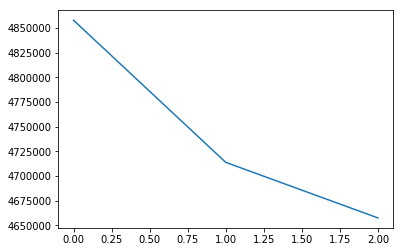

In [241]:
import matplotlib.pyplot as plt

plt.plot(range(len(history['loss'])), history['loss'])

## Try A Hidden Markov Model

In [35]:
from hmmlearn.hmm import MultinomialHMM
print(len(tokenizer.word_index)) # vocab size? 
x_train.shape

2030


(56, 40)

In [25]:
hmm = MultinomialHMM(n_components=10, n_iter = 100) # covariance_type="full"
hmm.fit(x_train)

Fitting a model with 20389 free scalar parameters with only 14336 data points will result in a degenerate solution.


MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=10,
               n_iter=100, params='ste',
               random_state=RandomState(MT19937) at 0x25A3CB82D08,
               startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
               verbose=False)

In [27]:
generated, y  = hmm.sample(20)  # np.array([1,2,3]).reshape(-1, 1)
generated = generated.flatten()
print(generated)

for pred in generated:
  print(idx2word[pred], end =' ')

[ 154    8   77  269  575    1   32 1497   12  449    8   10 1033   38
   30  140  116    1    1    1]
life in they ever neck i wanna sell it him in and sheep nigga we moonlight ai i i i 

### Train on 1D representation

In [21]:
print(x_train.shape)
print(x_train.flatten().shape)

hmm = MultinomialHMM(n_components=10, n_iter = 300) # covariance_type="full"
hmm.fit(x_train.flatten().reshape(-1, 1)) # max: 60000

Fitting a model with 20389 free scalar parameters with only 14336 data points will result in a degenerate solution.


(56, 256)
(14336,)


MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=10,
               n_iter=300, params='ste',
               random_state=RandomState(MT19937) at 0x25A3CB82D08,
               startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
               verbose=False)

In [28]:
generated, y = hmm.sample(20)  # np.array([1,2,3]).reshape(-1, 1)
generated = generated.flatten()
print(generated)
for pred in generated:
  print(idx2word[pred], end =' ')

[152 247 484 804 721   3 124 979  91 162   1  48   1  12  36  35  17  53
 201  47]
come mine ice fantasize patient you yuh cunts from yo i are i it fuck what like feel school was 

## Try the package [Pomegranate](https://pomegranate.readthedocs.io/en/latest/)

In [20]:
from pomegranate import *

data_sample = x_train[:10]
data_sample.shape

(10, 40)

In [21]:
# model = MarkovNetwork.from_samples(data_sample, n_jobs = 3)

In [33]:
# model = BayesianNetwork.from_samples(data_sample, n_jobs = 3)


In [54]:
model.predict(data_sample)

[-1, -1]

In [34]:
# MultivariateGaussianDistribution will cause crash. may data is the worng shape
# model = HiddenMarkovModel.from_samples(distribution = TODO, X= data_sample, n_components = 5, max_iterations=1)
# model.bake()
# model.fit(data_sample)


#### Debuging 